# Algumas Correlações

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.stats import pearsonr
from scipy.stats import linregress

from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

%matplotlib inline


#print('### Marketing Funnel by Olist ###')
#for idx, file in enumerate(os.listdir('dataset_marketing')):
#    print(idx, '-', file)
#print('\n---------------------------------------------\n')

#print('### Brazilian E-Commerce Public Dataset by Olist ###')
#for idx, file in enumerate(os.listdir('dataset_ecommerce')):
#    print(idx, '-', file)

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
# Lendo todos os csv
raw_marketingLeads = pd.read_csv('../dataset_marketing/olist_marketing_qualified_leads_dataset.csv')
raw_closedDeals = pd.read_csv('../dataset_marketing/olist_closed_deals_dataset.csv')
raw_customers = pd.read_csv('../brazilian-ecommerce/olist_customers_dataset.csv')
raw_geolocation = pd.read_csv('../brazilian-ecommerce/olist_geolocation_dataset.csv')
raw_orders = pd.read_csv('../brazilian-ecommerce/olist_orders_dataset.csv')
raw_orderItems = pd.read_csv('../brazilian-ecommerce/olist_order_items_dataset.csv')
raw_orderPayments = pd.read_csv('../brazilian-ecommerce/olist_order_payments_dataset.csv')
raw_orderReviews = pd.read_csv('../brazilian-ecommerce/olist_order_reviews_dataset.csv')
raw_products = pd.read_csv('../brazilian-ecommerce/olist_products_dataset.csv')
raw_sellers = pd.read_csv('../brazilian-ecommerce/olist_sellers_dataset.csv')

In [4]:
orders = raw_orders.copy()
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orderItems = raw_orderItems.copy()
orderReviews = raw_orderReviews.copy()

orderItems['freight_value'].corr(orderReviews['review_score'])

-0.0029904805219615467

In [6]:
frete_review = orderItems.merge(orderReviews, on='order_id', how='left')
frete_review.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [7]:
frete_review['freight_value'].corr(frete_review['review_score'])

-0.03600619736517387

In [8]:
data_pedido_aprovado = orders['order_approved_at']

In [9]:
data_pedido_aprovado = data_pedido_aprovado.astype('datetime64[ns]')
data_pedido_aprovado.head()

0   2017-10-02 11:07:15
1   2018-07-26 03:24:27
2   2018-08-08 08:55:23
3   2017-11-18 19:45:59
4   2018-02-13 22:20:29
Name: order_approved_at, dtype: datetime64[ns]

In [10]:
data_entrega_estimada = orders['order_estimated_delivery_date'].astype('datetime64[ns]')
data_entrega_estimada.head(5)

0   2017-10-18
1   2018-08-13
2   2018-09-04
3   2017-12-15
4   2018-02-26
Name: order_estimated_delivery_date, dtype: datetime64[ns]

In [11]:
diferenca_datas = data_entrega_estimada - data_pedido_aprovado
diferenca_datas.head(5)

0   15 days 12:52:45
1   17 days 20:35:33
2   26 days 15:04:37
3   26 days 04:14:01
4   12 days 01:39:31
dtype: timedelta64[ns]

In [12]:
products = raw_products.copy()

produtos_items = products.merge(orderItems, on='product_id', how='left')
produtos_items_pedidos = produtos_items.merge(orders, on='order_id', how='left')
produtos_items_pedidos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,2018-04-30 17:33:54,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,2018-02-06 19:11:15,248.00,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,2018-07-11 21:30:20,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,2018-08-07 09:10:13,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,2018-04-17 01:30:23,37.90,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00


In [13]:
produtos_items_pedidos['diferenca_aprovado_estimado'] = produtos_items_pedidos['order_estimated_delivery_date'].astype('datetime64[ns]') - produtos_items_pedidos['order_approved_at'].astype('datetime64[ns]')
produtos_items_pedidos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diferenca_aprovado_estimado
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,14 days 04:55:41
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,248.00,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,21 days 04:48:45
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,8 days 02:29:40
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,4 days 14:28:18
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,37.90,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,14 days 22:29:37


In [14]:
type(produtos_items_pedidos['diferenca_aprovado_estimado'])

pandas.core.series.Series

In [15]:
produtos_items_pedidos['diferenca_aprovado_estimado'] = produtos_items_pedidos['diferenca_aprovado_estimado'].dt.days
produtos_items_pedidos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diferenca_aprovado_estimado
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,10.91,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,248.00,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,21.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,79.80,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,8.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,112.30,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,4.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,37.90,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,14.0


In [16]:
produtos_items_pedidos['product_weight_g'].corr(produtos_items_pedidos['diferenca_aprovado_estimado'])

0.07920273187362332

In [17]:
produtos_items_pedidos['diferenca_aprovado_entregue'] = produtos_items_pedidos['order_delivered_customer_date'].astype('datetime64[ns]') - produtos_items_pedidos['order_approved_at'].astype('datetime64[ns]')
produtos_items_pedidos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diferenca_aprovado_estimado,diferenca_aprovado_entregue
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,14.0,2 days 21:37:58
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,21.0,15 days 18:15:53
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,8.0,2 days 01:53:56
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,4.0,3 days 05:42:50
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,14.0,2 days 21:11:21


In [18]:
produtos_items_pedidos['diferenca_aprovado_entregue'] = produtos_items_pedidos['diferenca_aprovado_entregue'].dt.days
produtos_items_pedidos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diferenca_aprovado_estimado,diferenca_aprovado_entregue
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,7.39,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,14.0,2.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,17.99,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,21.0,15.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,7.82,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,8.0,2.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,9.54,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,4.0,3.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,8.29,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,14.0,2.0


In [19]:
produtos_items_pedidos['product_weight_g'].corr(produtos_items_pedidos['diferenca_aprovado_entregue'])

0.08490967554961015

## Correlação de Review Score com intervalo entre Data de Compra e Aprovação

In [20]:
reviews = raw_orderReviews.copy() #pd.read_csv('../brazilian-ecommerce/olist_order_reviews_dataset.csv')
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
orders = raw_orders.copy() #pd.read_csv('../brazilian-ecommerce/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
order_reviews = pd.merge(orders, reviews, on='order_id')
order_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [23]:
order_reviews['order_purchase_timestamp_dt'] = pd.to_datetime(order_reviews['order_purchase_timestamp'])
order_reviews['order_delivered_customer_date_dt'] = pd.to_datetime(order_reviews['order_delivered_customer_date'])
order_reviews['timedelta'] = order_reviews['order_delivered_customer_date_dt'] - order_reviews['order_purchase_timestamp_dt']
order_reviews.head()[['timedelta', 'review_score']]

,timedelta,review_score
0,8 days 10:28:40,4
1,13 days 18:46:08,4
2,9 days 09:27:40,5
3,13 days 05:00:36,5
4,2 days 20:58:23,5


In [24]:
result = order_reviews['timedelta'].dt.days.corr(order_reviews['review_score'], 'spearman')
print(f'Correlação entre tempo da compra até a entrega e avaliação do cliente: {result}')

Correlação entre tempo da compra até a entrega e avaliação do cliente: -0.2363646941255332


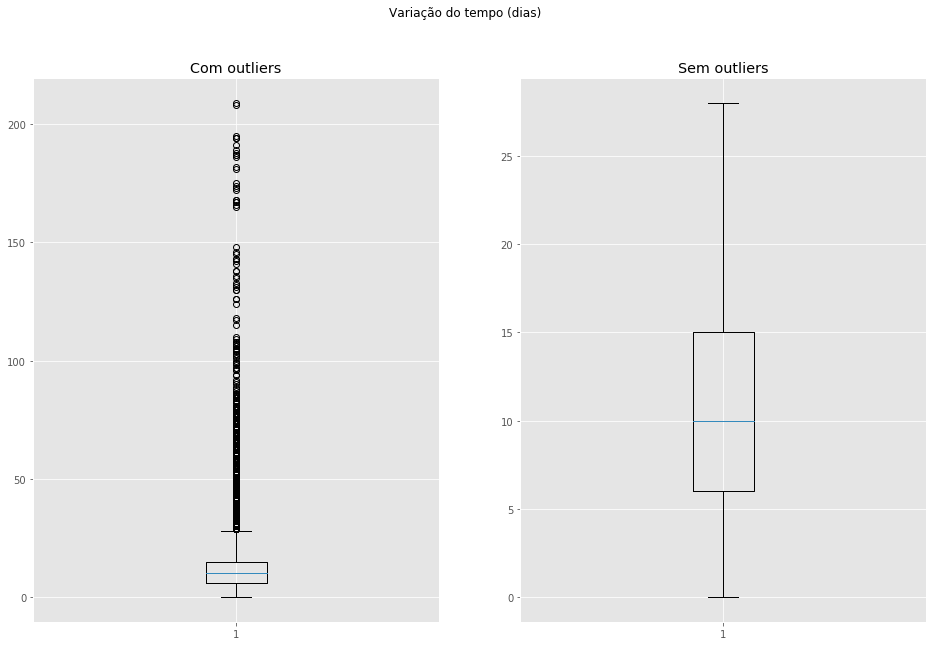

In [25]:
order_reviews = order_reviews[order_reviews['timedelta'].notnull()]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Variação do tempo (dias)')
ax1.boxplot(order_reviews['timedelta'].dt.days)
ax1.set_title('Com outliers')

ax2.boxplot(order_reviews['timedelta'].dt.days, showfliers=False)
ax2.set_title('Sem outliers')
plt.show()

# Tempo de Entrega x Review Score

In [26]:
reviews = raw_orderReviews.copy() #pd.read_csv('../brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = raw_orders.copy() #pd.read_csv('../brazilian-ecommerce/olist_orders_dataset.csv')
customers = raw_customers.copy() #pd.read_csv('../brazilian-ecommerce/olist_customers_dataset.csv')

customer_orders = pd.merge(customers, orders, on='customer_id')
customer_reviews = pd.merge(reviews, customer_orders, on='order_id')
customer_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


In [27]:
customer_reviews['delta_time'] = pd.to_datetime(customer_reviews['order_delivered_customer_date']) - pd.to_datetime(customer_reviews['order_purchase_timestamp'])
mask = customer_reviews['delta_time'].isna()
customer_reviews.loc[mask, 'delta_time'] = customer_reviews['delta_time'].mean()
customer_reviews.head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,6 days 03:11:52
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,9 days 10:52:01
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,13 days 07:32:26
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,10 days 15:27:22
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,18 days 05:34:32
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,eecafc3ff695f031bfe354a9fff9d437,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03 00:00:00,5 days 18:58:59
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34,840be0730010e9580efd289bc9f37706,dcd4940b3f96a3e2b73d8f73387230cf,8412,sao paulo,SP,delivered,2017-06-30 15:38:46,2017-06-30 15:50:17,2017-07-03 16:22:53,2017-07-15 12:57:24,2017-08-03 00:00:00,14 days 21:18:38
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06,98f485515e575607a8003b17e91990bd,c7b4fb0959a97e7033ff9bef3b1e2ba9,27521,resende,RJ,delivered,2018-08-07 23:12:29,2018-08-07 23:25:10,2018-08-08 14:18:00,2018-08-13 18:08:28,2018-10-10 00:00:00,5 days 18:55:59
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37,daf813bc2e41c86027d086e8dfb35571,8c89391790076834500661cc1e5d6860,12316,jacarei,SP,delivered,2017-05-08 13:35:48,2017-05-08 13:50:15,2017-05-09 14:19:29,2017-05-16 16:49:51,2017-05-30 00:00:00,8 days 03:14:03
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,a5224bdc7685fd39cd7a23404415493d,2bf6fd4ad93eb21b3d604481c48decbf,1306,sao paulo,SP,delivered,2018-05-14 10:29:02,2018-05-15 10:37:47,2018-05-15 13:29:00,2018-05-21 17:52:12,2018-06-06 00:00:00,7 days 07:23:10


In [28]:
corr = customer_reviews['delta_time'].dt.days.corr(customer_reviews['review_score'])
print(f'Tempo de entrega com review do cliente: {corr}')

# maior quantidade de vendas do Brasil
sp = customer_reviews[customer_reviews['customer_state'] == 'SP']
sp = sp[['delta_time', 'review_score']].groupby(sp['delta_time'].dt.days).count()
sp['review_score'] = sp['review_score']*100 / sp['review_score'].sum()

# estado que os autores residem
pe = customer_reviews[customer_reviews['customer_state'] == 'PE']
pe = pe[['delta_time', 'review_score']].groupby(pe['delta_time'].dt.days).count()
pe['review_score'] = pe['review_score']*100 / pe['review_score'].sum()

# menor quantidade de vendas do Brasil
ac = customer_reviews[customer_reviews['customer_state'] == 'AC']
ac = ac[['delta_time', 'review_score']].groupby(ac['delta_time'].dt.days).count()
ac['review_score'] = ac['review_score']*100 / ac['review_score'].sum()

brasil = customer_reviews[['delta_time', 'review_score']]\
    .groupby(customer_reviews['delta_time'].dt.days).count()
brasil['review_score'] = brasil['review_score']*100 / brasil['review_score'].sum()
brasil.head()

Tempo de entrega com review do cliente: -0.31384592122794963


,delta_time,review_score
delta_time,,
0,13,0.013
1,1574,1.574
2,3179,3.179
3,3867,3.867
4,4850,4.850


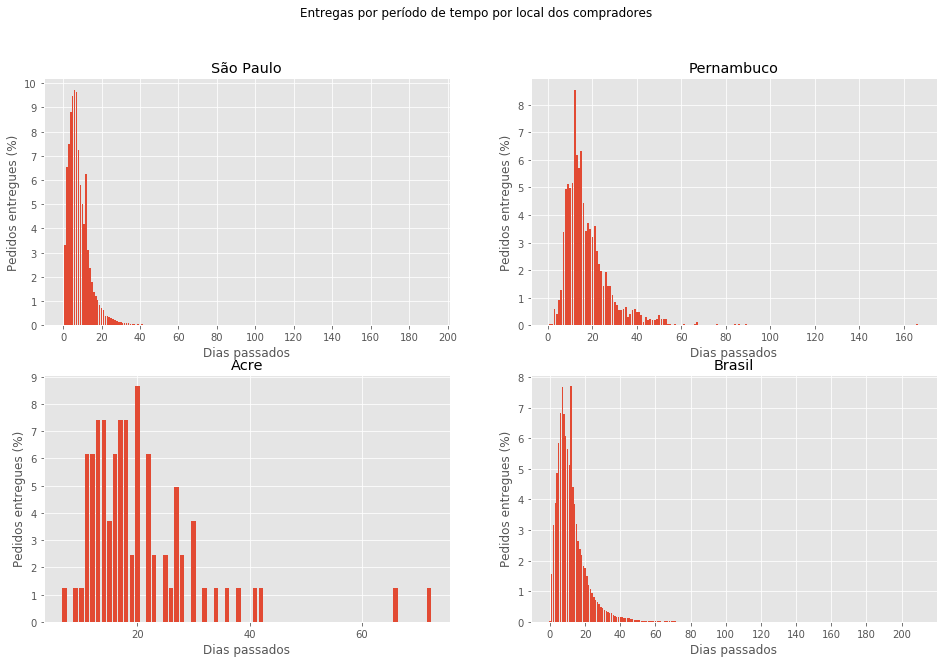

In [29]:
fig2, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig2.suptitle('Entregas por período de tempo por local dos compradores')

axes[0][0].set_title('São Paulo')
axes[0][1].set_title('Pernambuco')
axes[1][0].set_title('Acre')
axes[1][1].set_title('Brasil')

def set_labels_ticks_list(l):
    def set_labels_ticks_ax(ax):
        ax.set_ylabel('Pedidos entregues (%)')
        ax.set_xlabel('Dias passados')
        ax.set_yticks(np.arange(max(sp['review_score'])+1))
        ax.set_xticks(np.arange(max(brasil.index.values), step=20))
        
        return ax
    
    l = list(map(set_labels_ticks_ax, l))
    return l

axes = list(map(set_labels_ticks_list, axes))

axes[0][0].bar(sp.index, sp['review_score'], label='São Paulo')
axes[0][1].bar(pe.index, pe['review_score'], label='Pernambuco')
axes[1][0].bar(ac.index, ac['review_score'], label='Acre')
axes[1][1].bar(brasil.index, brasil['review_score'], label='Brasil')

plt.show()

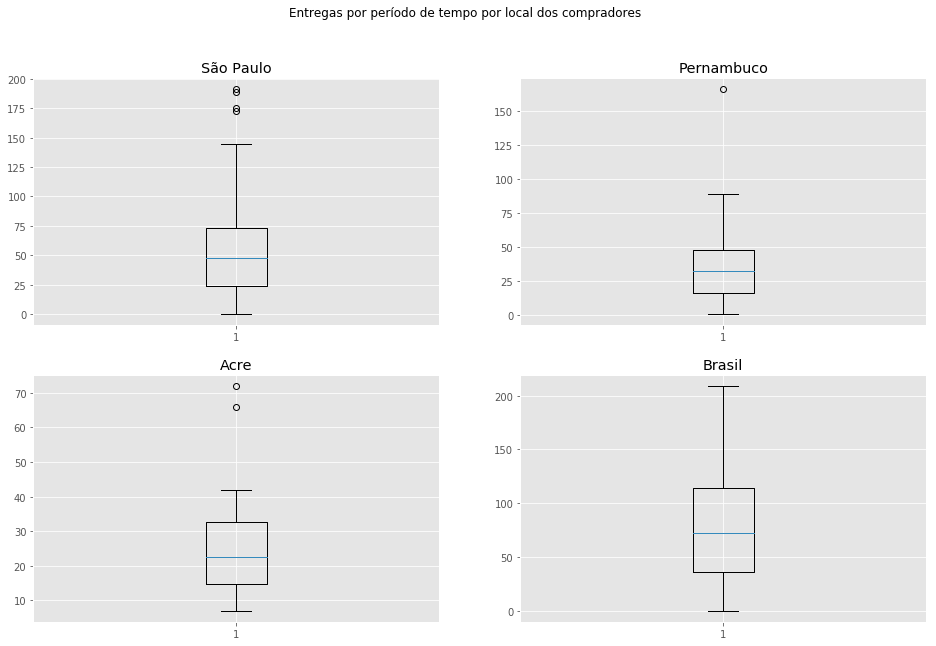

In [30]:
fig2, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig2.suptitle('Entregas por período de tempo por local dos compradores')

axes[0][0].set_title('São Paulo')
axes[0][1].set_title('Pernambuco')
axes[1][0].set_title('Acre')
axes[1][1].set_title('Brasil')

axes[0][0].boxplot(sp.index)
axes[0][1].boxplot(pe.index)
axes[1][0].boxplot(ac.index)
axes[1][1].boxplot(brasil.index)

plt.show()

# Correlação de Review Score x (Data Entrega - Data Estimada)

In [31]:
df_orders = raw_orders.copy() #pd.read_csv('../brazilian-ecommerce/olist_orders_dataset.csv')
df_reviews = raw_orderReviews.copy() #pd.read_csv('../brazilian-ecommerce/olist_order_reviews_dataset.csv')

df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

df_orders['order_delta_estimated_delivered_customer_date'] = (df_orders['order_delivered_customer_date'] - df_orders['order_estimated_delivery_date']).dt.days

df_orders_review = df_orders.merge(df_reviews, how='outer')

df_orders_review = df_orders_review[['order_delta_estimated_delivered_customer_date', 'review_score']].dropna(axis=0, how='any')

df_orders_review.head()

,order_delta_estimated_delivered_customer_date,review_score
0,-8.0,4
1,-6.0,4
2,-18.0,5
3,-13.0,5
4,-10.0,5


In [32]:
dataset = df_orders_review
dataset_x = dataset['order_delta_estimated_delivered_customer_date'] #Variável Independente
dataset_y = dataset['review_score'] #Variável Dependente

range_x = [dataset_x.min()-1, dataset_x.max()+1]
range_y = [dataset_y.min()-1, dataset_y.max()+1]

label_x = dataset_x.name
label_y = dataset_y.name

print('Range de X:', range_x)
print('Range de Y:', range_y)

Range de X: [-148.0, 189.0]
Range de Y: [0, 6]


In [33]:
df_orders_review[['order_delta_estimated_delivered_customer_date', 'review_score']].corr(method='pearson')

,order_delta_estimated_delivered_customer_date,review_score
order_delta_estimated_delivered_customer_date,1.000000,-0.268881
review_score,-0.268881,1.000000


In [34]:
df_orders_review[['order_delta_estimated_delivered_customer_date', 'review_score']].corr(method='kendall')

,order_delta_estimated_delivered_customer_date,review_score
order_delta_estimated_delivered_customer_date,1.000000,-0.140935
review_score,-0.140935,1.000000


In [35]:
df_orders_review[['order_delta_estimated_delivered_customer_date', 'review_score']].corr(method='spearman')

,order_delta_estimated_delivered_customer_date,review_score
order_delta_estimated_delivered_customer_date,1.000000,-0.178679
review_score,-0.178679,1.000000


In [36]:
model = linear_model.LinearRegression(normalize=False, fit_intercept=True)

num_observ = len(dataset_x)

x = dataset_x.values.reshape((num_observ, 1))
y = dataset_y.values

model.fit(x, y)
predicts = model.predict(x)

print('Score do modelo:', model.score(x, y))

Score do modelo: 0.07229710117866595


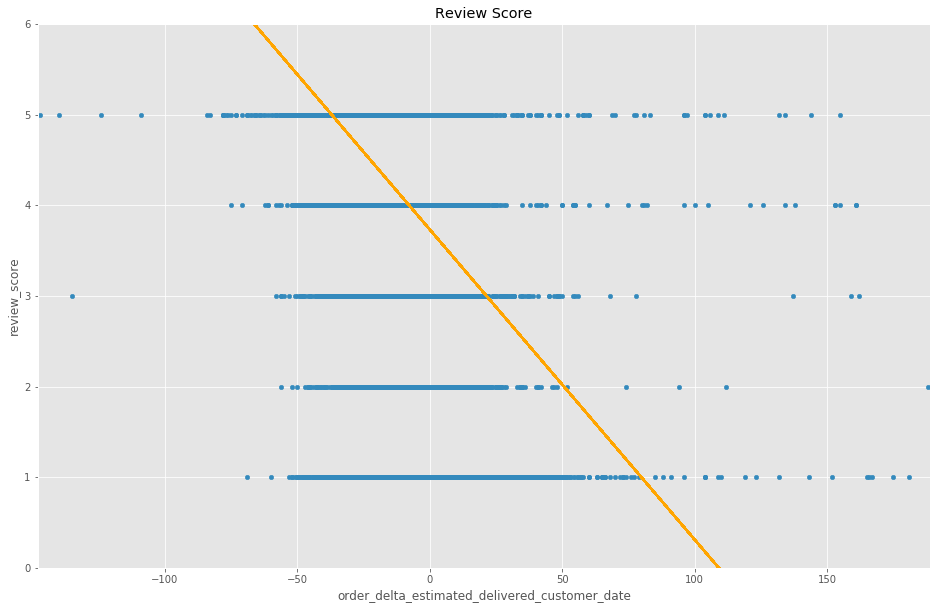

In [37]:
scatter_plot = dataset.plot(kind='scatter', x=dataset_x.name, y=dataset_y.name, xlim=range_x, ylim=range_y, title='Review Score')
scatter_plot.set_xlabel(label_x)
scatter_plot.set_ylabel(label_y)

regression_line = scatter_plot.plot(dataset_x, predicts, '-', color='orange', linewidth=2)

[]

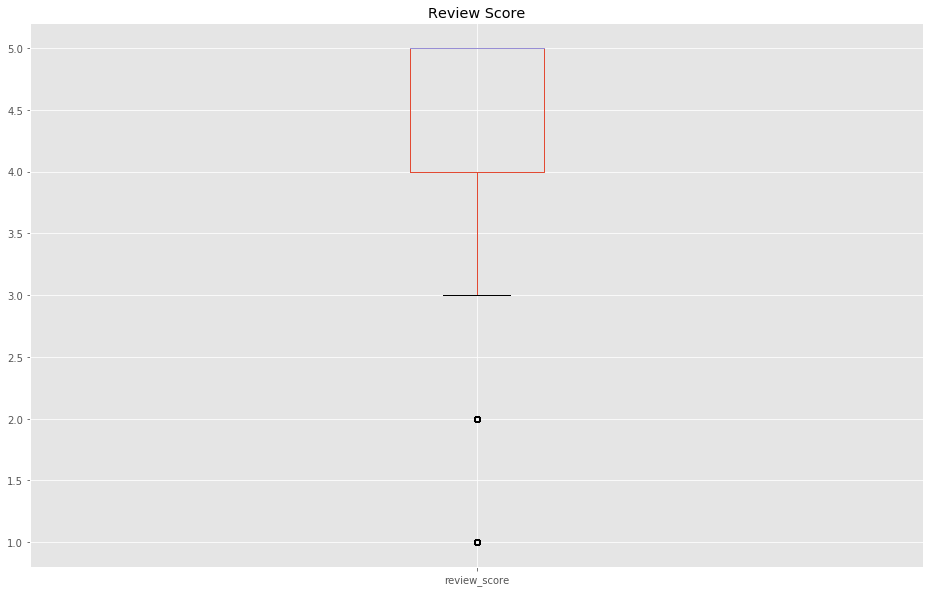

In [38]:
box_plot = dataset.plot(kind='box', x=dataset_x.name, title='Review Score')

box_plot.plot()

[]

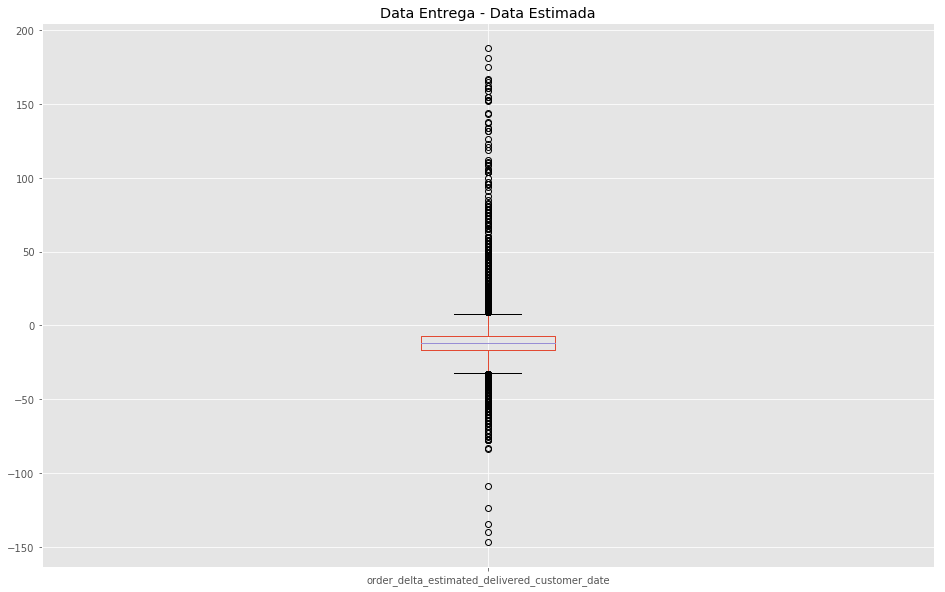

In [39]:
box_plot = dataset.plot(kind='box', x=dataset_y.name, title='Data Entrega - Data Estimada')

box_plot.plot()

In [40]:
print(model.coef_)
print(model.intercept_)

[-0.03423432]
3.7353583731231432


In [41]:
print('Valores esperados: \n', dataset_y.values[:10])

print('\nValores previstos: \n', predicts[:10])

Valores esperados: 
 [4 4 5 5 5 4 5 1 5 1]

Valores previstos: 
 [4.00923295 3.94076431 4.35157618 4.18040456 4.0777016  3.94076431
 4.14617024 4.83085669 3.97499863 4.04346727]


# Analise de Sentimentos (Classificação de 1 a 5, Muito Ruim a Muito Bom)

In [42]:
dataset = pd.read_csv("../brazilian-ecommerce/olist_public_dataset_v2.csv")
dataset = dataset[["review_score", "review_comment_message"]].dropna(axis=0, how='any')

dataset.head()

,review_score,review_comment_message
1,5,entrega em 2 dias produto c boa qualidade otim...
2,5,produto veio antes do prazo informado muito ob...
5,4,chegou bem antes do prazo ótimo vendedor
6,3,gostei do produto
12,5,o produto veio certinho muito bem embalado e b...


In [43]:
dataset.count()

review_score              42489
review_comment_message    42489
dtype: int64

In [44]:
comments = dataset['review_comment_message'].values
scores_class = dataset['review_score'].values

#vectorizer = CountVectorizer(analyzer="word")
vectorizer = CountVectorizer(ngram_range=(1,2))

freq_comments = vectorizer.fit_transform(comments)
modelo = MultinomialNB()
modelo.fit(freq_comments,scores_class)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
df_review = raw_orderReviews.copy() #pd.read_csv('../brazilian-ecommerce/olist_order_reviews_dataset.csv')

testes = df_review['review_comment_message'].dropna(axis=0, how='any')
results_comparsion = df_review[['review_comment_message', 'review_score']].dropna(axis=0, how='any')
testes = pd.Series.tolist(testes)

In [46]:
freq_testes = vectorizer.transform(testes)
predicts = modelo.predict(freq_testes)

results_comparsion['predicts'] = predicts
results_comparsion.head(15)

,review_comment_message,review_score,predicts
3,Recebi bem antes do prazo estipulado.,5,5
4,Parabéns lojas lannister adorei comprar pela I...,5,5
9,aparelho eficiente. no site a marca do aparelh...,4,4
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,4
15,"Vendedor confiável, produto ok e entrega antes...",5,5
16,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2,1
19,Péssimo,1,1
22,Loja nota 10,5,5
24,obrigado pela atençao amim dispensada,5,5
27,A compra foi realizada facilmente.\r\nA entreg...,5,5


In [47]:
resultados = cross_val_predict(modelo, freq_comments, scores_class, cv=10)
metrics.accuracy_score(scores_class,resultados)

0.6915907646685024

In [48]:
scores_list=[1, 2, 3, 4, 5]
print (metrics.classification_report(scores_class,resultados,scores_list))

              precision    recall  f1-score   support

           1       0.65      0.90      0.75      9304
           2       0.53      0.06      0.11      2353
           3       0.37      0.17      0.23      3966
           4       0.37      0.14      0.20      6102
           5       0.77      0.93      0.84     20764

   micro avg       0.69      0.69      0.69     42489
   macro avg       0.54      0.44      0.43     42489
weighted avg       0.63      0.69      0.63     42489



In [49]:
print (pd.crosstab(scores_class, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      1    2     3     4      5    All
Real                                         
1         8385   65   336   166    352   9304
2         1563  143   234   175    238   2353
3         1624   29   682   561   1070   3966
4          729   15   376   825   4157   6102
5          670   18   233   493  19350  20764
All      12971  270  1861  2220  25167  42489


## Correlação (Diferença entre data estimada x data entregue com o review_score)

In [50]:
customers = pd.read_csv('../brazilian-ecommerce/olist_customers_dataset.csv')
local = customers
local['regiao'] = ('')
local.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,


In [51]:
#Setando a região de cada estado
local.loc[(local.customer_state == 'SP') | (local.customer_state == 'MG') | (local.customer_state == 'ES') | (local.customer_state == 'RJ'), 'regiao'] = 'Sudeste'
local.loc[(local.customer_state == 'AM') | (local.customer_state == 'RR') | (local.customer_state == 'AP') | (local.customer_state == 'PA') | (local.customer_state == 'TO') | (local.customer_state == 'RO') | (local.customer_state == 'AC'), 'regiao'] = 'Norte'
local.loc[(local.customer_state == 'MA') | (local.customer_state == 'PI') | (local.customer_state == 'CE') | (local.customer_state == 'RN') | (local.customer_state == 'PE') | (local.customer_state == 'PB') | (local.customer_state == 'SE') | (local.customer_state == 'AL') | (local.customer_state == 'BA'), 'regiao'] = 'Nordeste'
local.loc[(local.customer_state == 'MT') | (local.customer_state == 'MS') | (local.customer_state == 'GO') | (local.customer_state == 'DF'), 'regiao'] = 'Centro-Oeste'
local.loc[(local.customer_state == 'PR') | (local.customer_state == 'RS') | (local.customer_state == 'SC'), 'regiao'] = 'Sul'
local.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste


In [52]:
orders = raw_orders.copy() #pd.read_csv('../brazilian-ecommerce/olist_orders_dataset.csv')
orders.head()

customers_orders = pd.merge(local,orders,on='customer_id')
customers_orders.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sudeste,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sudeste,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sudeste,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [53]:
reviews_orders = pd.merge(customers_orders, reviews, on='order_id')
reviews_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sudeste,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sudeste,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sudeste,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,Sul,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,9a6614162d285301aa3ef6de4be75265,5,NaN,Loja responsável,2017-09-29 00:00:00,2017-10-01 21:52:53
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,Sudeste,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05 00:00:00,bc88d3b86fa8443d42894eb7b5f0d73c,5,NaN,NaN,2018-02-21 00:00:00,2018-02-26 13:53:18
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,Sudeste,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,2381e1fb0932d9459573a0553dd8a2b5,3,NaN,NaN,2017-11-28 00:00:00,2017-11-28 17:14:46
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,Sul,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20 00:00:00,8566d94f7bf3bedbb4ca6a29725fc382,5,NaN,chegou antes do prometido,2018-01-27 00:00:00,2018-01-30 19:18:27
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,Sudeste,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05 00:00:00,07f4bedc3ab711f4b3400ceaecdd9f9b,5,NaN,"ótimo, entregou antes da data prevista.",2018-01-14 00:00:00,2018-01-16 19:29:39


In [54]:
reviews_orders['order_delivered_customer_date'] = pd.to_datetime(reviews_orders['order_delivered_customer_date'])
reviews_orders['order_estimated_delivery_date'] = pd.to_datetime(reviews_orders['order_estimated_delivery_date'])

reviews_orders['order_delta_estimated_delivered_customer_date'] = (reviews_orders['order_delivered_customer_date'] - reviews_orders['order_estimated_delivery_date']).dt.days


In [55]:
resultado = reviews_orders.groupby(['regiao'])[['order_delta_estimated_delivered_customer_date', 'review_score']].corr(method='spearman') 

resultado = resultado[(resultado['review_score'] < 1)]
resultado

,,order_delta_estimated_delivered_customer_date,review_score
regiao,,,
Centro-Oeste,order_delta_estimated_delivered_customer_date,1.0,-0.190315
Nordeste,order_delta_estimated_delivered_customer_date,1.0,-0.295600
Norte,order_delta_estimated_delivered_customer_date,1.0,-0.226258
Sudeste,order_delta_estimated_delivered_customer_date,1.0,-0.163497
Sul,order_delta_estimated_delivered_customer_date,1.0,-0.167225


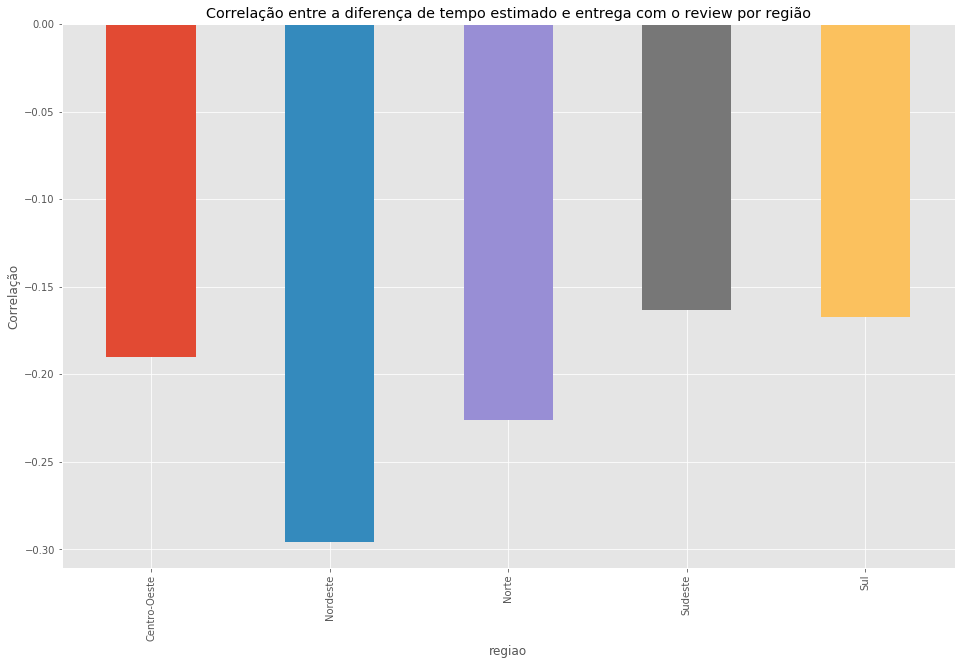

In [56]:
fig, ax = plt.subplots()
plt.title('Correlação entre a diferença de tempo estimado e entrega com o review por região')
plt.ylabel("Correlação")
plt.xlabel("Região ")
resultado.groupby(['regiao'])['review_score'].mean().plot(kind='bar')

## Correlação tempo de entrega x review

In [57]:
local.head()
customers_orders.head()

reviews_orders.head()

reviews_orders['order_purchase_timestamp'] = pd.to_datetime(reviews_orders['order_purchase_timestamp'])

reviews_orders['order_delta_purchase_delivered_customer_date'] = (reviews_orders['order_delivered_customer_date'] - reviews_orders['order_purchase_timestamp']).dt.days
reviews_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao,order_id,order_status,order_purchase_timestamp,order_approved_at,...,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_delta_estimated_delivered_customer_date,order_delta_purchase_delivered_customer_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,-11.0,8.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sudeste,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,-8.0,16.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sudeste,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sudeste,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,-13.0,14.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,-6.0,11.0
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,Sul,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,...,2017-09-28 17:32:43,2017-10-04,9a6614162d285301aa3ef6de4be75265,5,NaN,Loja responsável,2017-09-29 00:00:00,2017-10-01 21:52:53,-6.0,13.0
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,Sudeste,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,...,2018-02-20 16:25:51,2018-03-05,bc88d3b86fa8443d42894eb7b5f0d73c,5,NaN,NaN,2018-02-21 00:00:00,2018-02-26 13:53:18,-13.0,1.0
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,Sudeste,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,...,2017-11-27 12:44:36,2017-12-08,2381e1fb0932d9459573a0553dd8a2b5,3,NaN,NaN,2017-11-28 00:00:00,2017-11-28 17:14:46,-11.0,10.0
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,Sul,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,...,2018-01-26 15:17:57,2018-02-20,8566d94f7bf3bedbb4ca6a29725fc382,5,NaN,chegou antes do prometido,2018-01-27 00:00:00,2018-01-30 19:18:27,-25.0,8.0
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,Sudeste,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,...,2018-01-13 14:51:55,2018-02-05,07f4bedc3ab711f4b3400ceaecdd9f9b,5,NaN,"ótimo, entregou antes da data prevista.",2018-01-14 00:00:00,2018-01-16 19:29:39,-23.0,5.0


In [58]:
#Correlação total, sem filtrar pro região
correlacao_total = reviews_orders[['order_delta_purchase_delivered_customer_date', 'review_score']].corr(method='spearman') 
correlacao_total

,order_delta_purchase_delivered_customer_date,review_score
order_delta_purchase_delivered_customer_date,1.000000,-0.236365
review_score,-0.236365,1.000000


In [59]:
resultado_final = reviews_orders.groupby(['regiao'])[['order_delta_purchase_delivered_customer_date', 'review_score']].corr(method='spearman') 
resultado_final = resultado_final[(resultado_final['review_score'] < 1)]
resultado_final

,,order_delta_purchase_delivered_customer_date,review_score
regiao,,,
Centro-Oeste,order_delta_purchase_delivered_customer_date,1.0,-0.232459
Nordeste,order_delta_purchase_delivered_customer_date,1.0,-0.323103
Norte,order_delta_purchase_delivered_customer_date,1.0,-0.287884
Sudeste,order_delta_purchase_delivered_customer_date,1.0,-0.224459
Sul,order_delta_purchase_delivered_customer_date,1.0,-0.235809


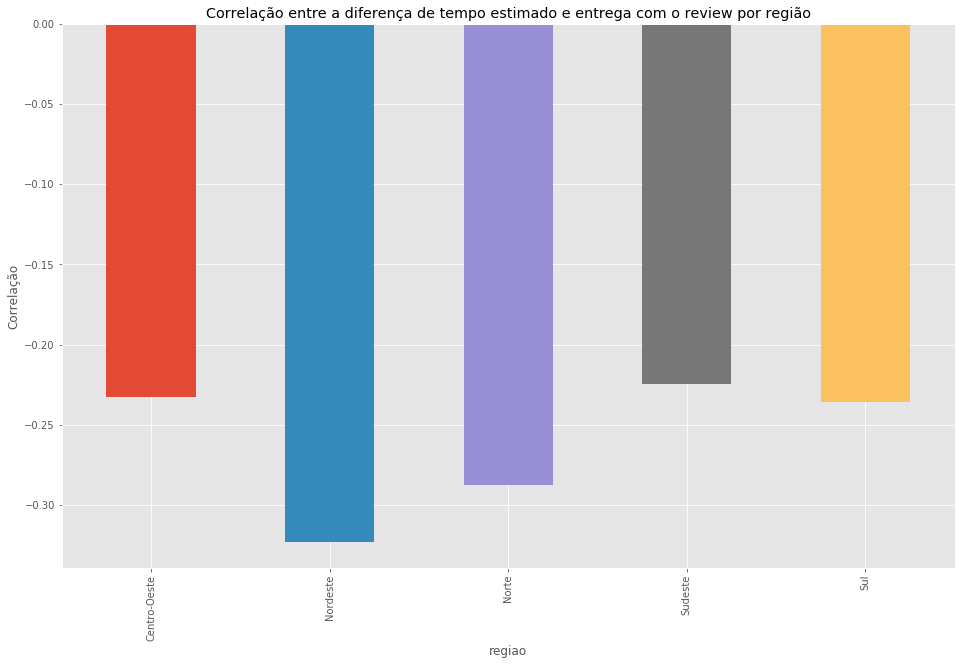

In [60]:
fig, ax = plt.subplots()
plt.title('Correlação entre a diferença de tempo estimado e entrega com o review por região')
plt.ylabel("Correlação")
plt.xlabel("Região ")
resultado_final.groupby(['regiao'])['review_score'].mean().plot(kind='bar')

## Média de tempo entre o primeiro contato até a data da compra

In [61]:
deals = pd.read_csv('../dataset_marketing/olist_closed_deals_dataset.csv')
leads = pd.read_csv('../dataset_marketing/olist_marketing_qualified_leads_dataset.csv')

tabela = pd.merge(deals, leads, on='mql_id')[['mql_id','first_contact_date','won_date','origin']]
tabela['first_contact_date'] = pd.to_datetime(tabela['first_contact_date'])
tabela['won_date'] = pd.to_datetime(tabela['won_date'])
tabela['timedelta'] = tabela['won_date'] - tabela['first_contact_date']

tabela['timedelta'] = tabela['timedelta'].dt.days

tabela.head()

,mql_id,first_contact_date,won_date,origin,timedelta
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,2018-02-26 19:58:54,organic_search,5
1,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2018-05-08 20:17:59,referral,34
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,2018-06-05 17:27:23,organic_search,63
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-14,2018-01-17 13:51:03,paid_search,3
4,ffe640179b554e295c167a2f6be528e0,2017-10-09,2018-07-03 20:17:45,unknown,267


In [62]:
tabela= tabela[['origin','timedelta']]
tabela.groupby(['origin'])['timedelta'].mean().reset_index()

,origin,timedelta
0,direct_traffic,31.125000
1,display,10.333333
2,email,52.200000
3,organic_search,50.000000
4,other,15.250000
5,other_publicities,39.333333
6,paid_search,56.600000
7,referral,32.541667
8,social,60.960000
9,unknown,41.290503


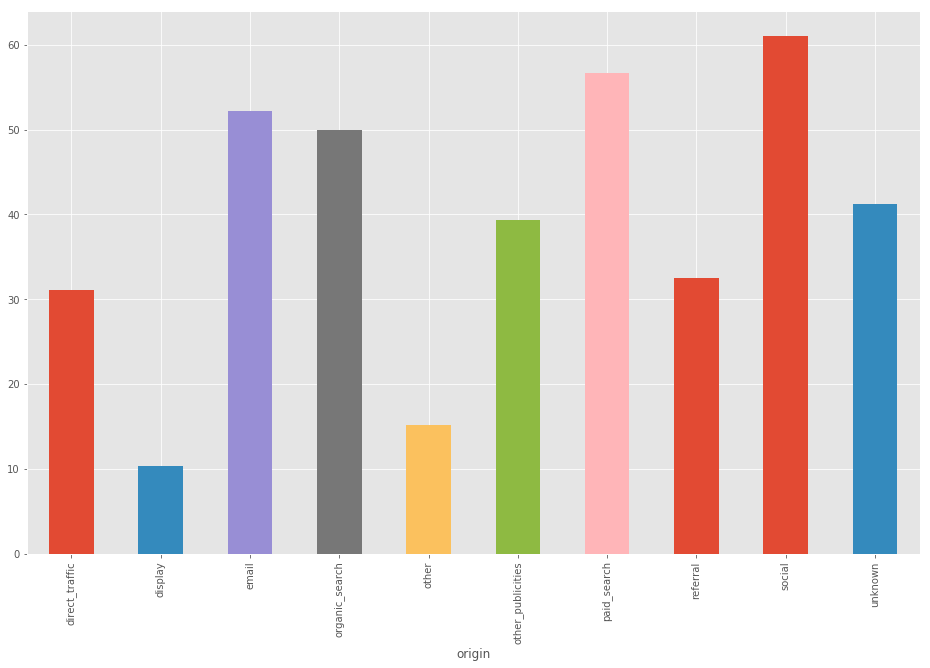

In [63]:
fig, ax = plt.subplots()
tabela.groupby(['origin'])['timedelta'].mean().plot(kind='bar')

## Quantidade de lojistas que se tornaram cliente pela origem

In [64]:
leads2 = pd.read_csv('../dataset_marketing/olist_marketing_qualified_leads_dataset.csv')
leads2.groupby('origin').size().reset_index()

,origin,0
0,direct_traffic,499
1,display,118
2,email,493
3,organic_search,2296
4,other,150
5,other_publicities,65
6,paid_search,1586
7,referral,284
8,social,1350
9,unknown,1099


# Categorias com mais Vendas e Faturamentos

In [65]:
produtos = raw_products.copy() #RangeIndex: 32951 entries, 0 to 32950
orderItens = raw_orderItems.copy()
orders = raw_orders.copy()

ano = 2017

produtos_orderItens = produtos.merge(orderItems).merge(orders)
produtos_orderItens['order_purchase_timestamp'] = pd.to_datetime(produtos_orderItens['order_purchase_timestamp'])
produtos_orderItens = produtos_orderItens[produtos_orderItens['order_purchase_timestamp'].dt.year == ano]
produtos_orderItens2 = produtos_orderItens.copy()
produtos_orderItens_relogio = produtos_orderItens.copy()
produtos_orderItens_beleza = produtos_orderItens.copy()

produtos_orderItens.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,c6343db6c1801f9c3301166f02931116,...,2017-12-11 11:30:51,968.00,44.30,30f840412466fa26e5c035e1ad1fdec3,delivered,2017-12-05 11:14:58,2017-12-05 12:01:44,2017-12-08 20:46:55,2017-12-18 18:59:14,2018-01-03 00:00:00
8,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,6ecf7023e8dd4ec8b08746c35b9fcb60,...,2017-11-30 16:31:00,9.99,16.02,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00
9,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,6ecf7023e8dd4ec8b08746c35b9fcb60,...,2017-11-30 16:31:00,9.99,16.02,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00
10,140a8324a66db81d299b24b30d93098e,moveis_decoracao,54.0,184.0,2.0,8450.0,40.0,32.0,40.0,6ecf7023e8dd4ec8b08746c35b9fcb60,...,2017-11-30 16:31:00,39.90,16.02,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00
11,140a8324a66db81d299b24b30d93098e,moveis_decoracao,54.0,184.0,2.0,8450.0,40.0,32.0,40.0,6ecf7023e8dd4ec8b08746c35b9fcb60,...,2017-11-30 16:31:00,39.90,16.02,181e2217f874cb5390be37f378db5e07,delivered,2017-11-24 14:22:48,2017-11-24 16:33:43,2017-12-01 20:55:04,2017-12-07 09:38:30,2017-12-19 00:00:00


### Agrupando as Categorias

In [66]:
produtos_orderItens = produtos_orderItens[['product_category_name', 'price', 'freight_value']].groupby(
    'product_category_name', as_index=False).agg(['sum', 'size']).reset_index()

produtos_orderItens[['price_sum', 'freight_value_sum', 'counts']] = produtos_orderItens[[('price', 'sum'), ('freight_value', 'sum'), ('freight_value', 'size')]]
produtos_orderItens.drop(['price', 'freight_value'], axis=1, inplace=True, level=0)

produtos_orderItens['price_total'] = produtos_orderItens['price_sum'].sum()
produtos_orderItens['freight_total'] = produtos_orderItens['freight_value_sum'].sum()
produtos_orderItens['counts_total'] = produtos_orderItens['counts'].sum()

produtos_orderItens['price_percent'] = (produtos_orderItens['price_sum'] / produtos_orderItens['price_total'])*100
produtos_orderItens['freight_percent'] = (produtos_orderItens['freight_value_sum'] / produtos_orderItens['freight_total'])*100
produtos_orderItens['counts_percent'] = (produtos_orderItens['counts'] / produtos_orderItens['counts_total'])*100

produtos_orderItens.sort_values(['counts'], ascending=False).head(10)

,product_category_name,price_sum,freight_value_sum,counts,price_total,freight_total,counts_total,price_percent,freight_percent,counts_percent
,,,,,,,,,,
13,cama_mesa_banho,498440.43,91840.01,5223,6049759.67,970779.32,49947,8.239012,9.460442,10.457085
54,moveis_decoracao,337213.12,81644.03,4147,6049759.67,970779.32,49947,5.573992,8.410153,8.302801
32,esporte_lazer,452148.84,78581.19,4095,6049759.67,970779.32,49947,7.473831,8.094650,8.198691
11,beleza_saude,481755.71,68664.40,3668,6049759.67,970779.32,49947,7.963221,7.073121,7.343784
44,informatica_acessorios,405078.69,57682.58,3098,6049759.67,970779.32,49947,6.695782,5.941884,6.202575
71,utilidades_domesticas,231073.49,54204.78,2906,6049759.67,970779.32,49947,3.819548,5.583636,5.818167
12,brinquedos,307975.48,47776.92,2602,6049759.67,970779.32,49947,5.090706,4.921502,5.209522
40,ferramentas_jardim,268882.71,54802.99,2463,6049759.67,970779.32,49947,4.444519,5.645257,4.931227
26,cool_stuff,393620.65,50472.14,2315,6049759.67,970779.32,49947,6.506385,5.199136,4.634913


In [67]:
produtos_orderItens.sort_values(['price_sum'], ascending=False).head(10)

,product_category_name,price_sum,freight_value_sum,counts,price_total,freight_total,counts_total,price_percent,freight_percent,counts_percent
,,,,,,,,,,
13,cama_mesa_banho,498440.43,91840.01,5223,6049759.67,970779.32,49947,8.239012,9.460442,10.457085
65,relogios_presentes,492794.50,37292.32,2283,6049759.67,970779.32,49947,8.145687,3.841483,4.570845
11,beleza_saude,481755.71,68664.40,3668,6049759.67,970779.32,49947,7.963221,7.073121,7.343784
32,esporte_lazer,452148.84,78581.19,4095,6049759.67,970779.32,49947,7.473831,8.094650,8.198691
44,informatica_acessorios,405078.69,57682.58,3098,6049759.67,970779.32,49947,6.695782,5.941884,6.202575
26,cool_stuff,393620.65,50472.14,2315,6049759.67,970779.32,49947,6.506385,5.199136,4.634913
54,moveis_decoracao,337213.12,81644.03,4147,6049759.67,970779.32,49947,5.573992,8.410153,8.302801
12,brinquedos,307975.48,47776.92,2602,6049759.67,970779.32,49947,5.090706,4.921502,5.209522
40,ferramentas_jardim,268882.71,54802.99,2463,6049759.67,970779.32,49947,4.444519,5.645257,4.931227


In [68]:
produtos_orderItens.sort_values(['freight_value_sum'], ascending=False).head(10)

,product_category_name,price_sum,freight_value_sum,counts,price_total,freight_total,counts_total,price_percent,freight_percent,counts_percent
,,,,,,,,,,
13,cama_mesa_banho,498440.43,91840.01,5223,6049759.67,970779.32,49947,8.239012,9.460442,10.457085
54,moveis_decoracao,337213.12,81644.03,4147,6049759.67,970779.32,49947,5.573992,8.410153,8.302801
32,esporte_lazer,452148.84,78581.19,4095,6049759.67,970779.32,49947,7.473831,8.094650,8.198691
11,beleza_saude,481755.71,68664.40,3668,6049759.67,970779.32,49947,7.963221,7.073121,7.343784
44,informatica_acessorios,405078.69,57682.58,3098,6049759.67,970779.32,49947,6.695782,5.941884,6.202575
40,ferramentas_jardim,268882.71,54802.99,2463,6049759.67,970779.32,49947,4.444519,5.645257,4.931227
71,utilidades_domesticas,231073.49,54204.78,2906,6049759.67,970779.32,49947,3.819548,5.583636,5.818167
26,cool_stuff,393620.65,50472.14,2315,6049759.67,970779.32,49947,6.506385,5.199136,4.634913
12,brinquedos,307975.48,47776.92,2602,6049759.67,970779.32,49947,5.090706,4.921502,5.209522


In [69]:
produtos_orderItens.sort_values(['counts', 'price_sum', 'freight_value_sum'], ascending=False).head(10)

,product_category_name,price_sum,freight_value_sum,counts,price_total,freight_total,counts_total,price_percent,freight_percent,counts_percent
,,,,,,,,,,
13,cama_mesa_banho,498440.43,91840.01,5223,6049759.67,970779.32,49947,8.239012,9.460442,10.457085
54,moveis_decoracao,337213.12,81644.03,4147,6049759.67,970779.32,49947,5.573992,8.410153,8.302801
32,esporte_lazer,452148.84,78581.19,4095,6049759.67,970779.32,49947,7.473831,8.094650,8.198691
11,beleza_saude,481755.71,68664.40,3668,6049759.67,970779.32,49947,7.963221,7.073121,7.343784
44,informatica_acessorios,405078.69,57682.58,3098,6049759.67,970779.32,49947,6.695782,5.941884,6.202575
71,utilidades_domesticas,231073.49,54204.78,2906,6049759.67,970779.32,49947,3.819548,5.583636,5.818167
12,brinquedos,307975.48,47776.92,2602,6049759.67,970779.32,49947,5.090706,4.921502,5.209522
40,ferramentas_jardim,268882.71,54802.99,2463,6049759.67,970779.32,49947,4.444519,5.645257,4.931227
26,cool_stuff,393620.65,50472.14,2315,6049759.67,970779.32,49947,6.506385,5.199136,4.634913


In [70]:
produtos_orderItens.sort_values(['price_sum', 'counts', 'freight_value_sum'], ascending=False).head(10)

,product_category_name,price_sum,freight_value_sum,counts,price_total,freight_total,counts_total,price_percent,freight_percent,counts_percent
,,,,,,,,,,
13,cama_mesa_banho,498440.43,91840.01,5223,6049759.67,970779.32,49947,8.239012,9.460442,10.457085
65,relogios_presentes,492794.50,37292.32,2283,6049759.67,970779.32,49947,8.145687,3.841483,4.570845
11,beleza_saude,481755.71,68664.40,3668,6049759.67,970779.32,49947,7.963221,7.073121,7.343784
32,esporte_lazer,452148.84,78581.19,4095,6049759.67,970779.32,49947,7.473831,8.094650,8.198691
44,informatica_acessorios,405078.69,57682.58,3098,6049759.67,970779.32,49947,6.695782,5.941884,6.202575
26,cool_stuff,393620.65,50472.14,2315,6049759.67,970779.32,49947,6.506385,5.199136,4.634913
54,moveis_decoracao,337213.12,81644.03,4147,6049759.67,970779.32,49947,5.573992,8.410153,8.302801
12,brinquedos,307975.48,47776.92,2602,6049759.67,970779.32,49947,5.090706,4.921502,5.209522
40,ferramentas_jardim,268882.71,54802.99,2463,6049759.67,970779.32,49947,4.444519,5.645257,4.931227


In [71]:
produtos_orderItens = produtos_orderItens.sort_values(['price_sum', 'counts', 'freight_value_sum'], ascending=False).head(10)

categoria = produtos_orderItens.iloc[0, 0]
produtos_orderItens2 = produtos_orderItens2[produtos_orderItens2['product_category_name'].isin([categoria])]
produtos_orderItens_relogio = produtos_orderItens_relogio[produtos_orderItens_relogio['product_category_name'] == 'relogios_presentes']
produtos_orderItens_beleza = produtos_orderItens_beleza[produtos_orderItens_beleza['product_category_name'] == 'beleza_saude']

produtos_orderItens2.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value
count,5223.000000,5223.000000,5223.000000,5223.000000,5223.000000,5223.000000,5223.000000,5223.000000,5223.000000,5223.000000
mean,52.262110,408.487842,1.578212,2306.547387,38.763737,12.686196,31.796094,1.206586,95.431827,17.583766
std,7.437602,390.091397,1.191843,3291.321814,12.764614,8.549277,10.093206,0.608584,71.702045,8.663241
min,22.000000,58.000000,1.000000,50.000000,13.000000,2.000000,11.000000,1.000000,6.990000,0.000000
25%,49.000000,188.000000,1.000000,800.000000,30.000000,8.000000,26.000000,1.000000,49.890000,13.210000
50%,54.000000,288.000000,1.000000,1383.000000,40.000000,10.000000,33.000000,1.000000,88.900000,16.110000
75%,57.000000,507.000000,2.000000,2100.000000,46.000000,15.000000,38.000000,1.000000,119.900000,18.250000
max,68.000000,3863.000000,8.000000,40425.000000,105.000000,93.000000,118.000000,11.000000,1740.000000,123.440000


### Categorias que mais faturam

[]

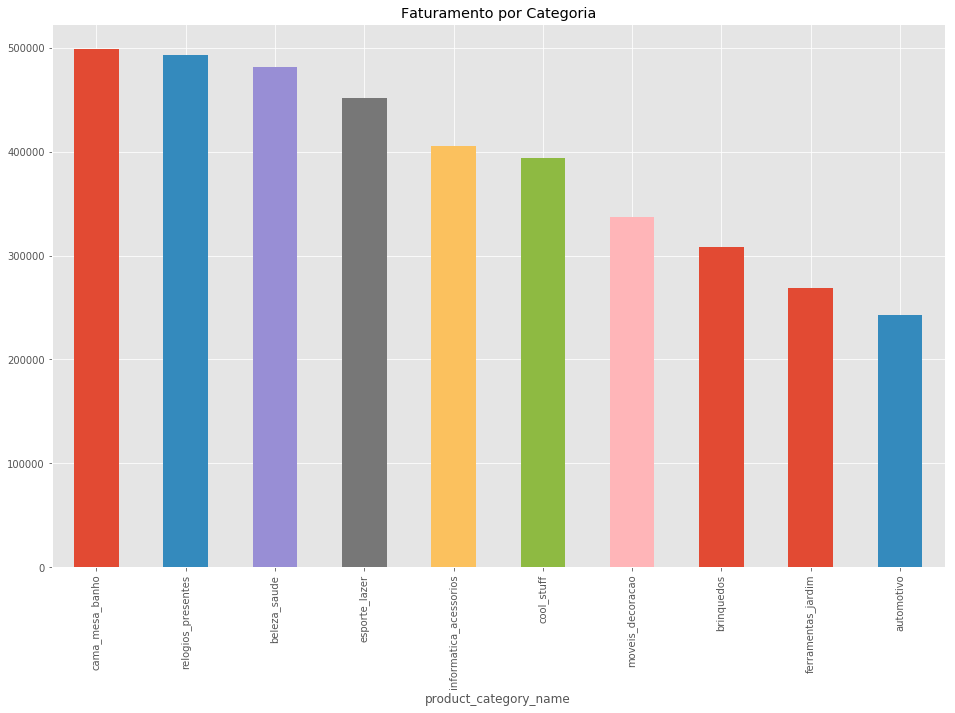

In [72]:
df_temp = produtos_orderItens.sort_values(['price_sum'], ascending=False).head(10)

tempBarPlot = df_temp.plot(kind='bar', x=df_temp['product_category_name'].name, y=df_temp['price_sum'].name, legend=False)
tempBarPlot.set_title('Faturamento por Categoria')

tempBarPlot.plot()

In [73]:
months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

produtos_orderItens2 = produtos_orderItens2.groupby(produtos_orderItens2['order_purchase_timestamp'].dt.month).sum()
produtos_orderItens_relogio = produtos_orderItens_relogio.groupby(produtos_orderItens_relogio['order_purchase_timestamp'].dt.month).sum()
produtos_orderItens_beleza = produtos_orderItens_beleza.groupby(produtos_orderItens_beleza['order_purchase_timestamp'].dt.month).sum()

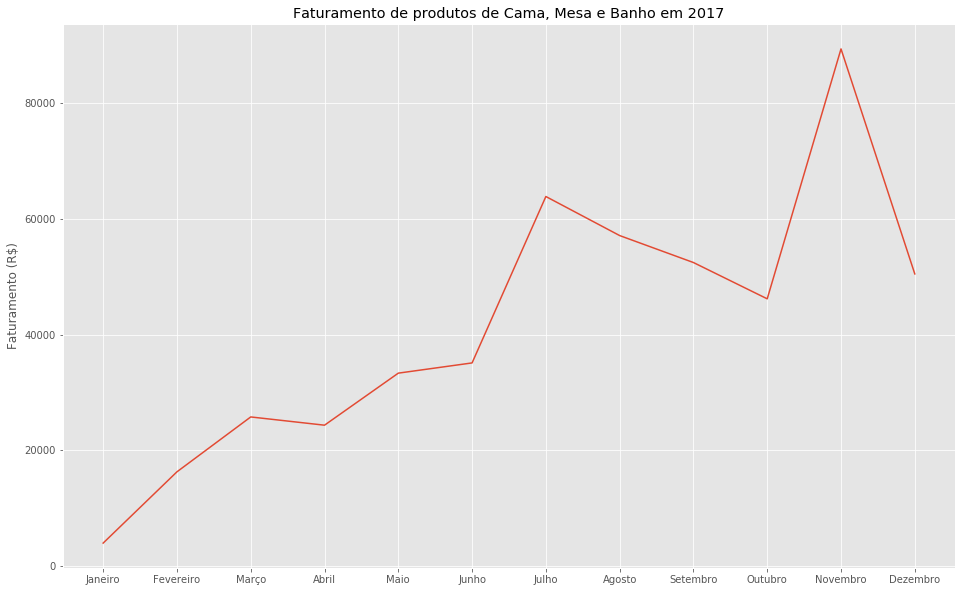

In [74]:
fig, ax = plt.subplots()
ax.set_title('Faturamento de produtos de Cama, Mesa e Banho em ' +str(ano))
ax.set_ylabel('Faturamento (R$)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.plot(produtos_orderItens2.index, produtos_orderItens2['price'])
#ax.scatter(produtos_orderItens2.index, produtos_orderItens2['price'])
plt.show()

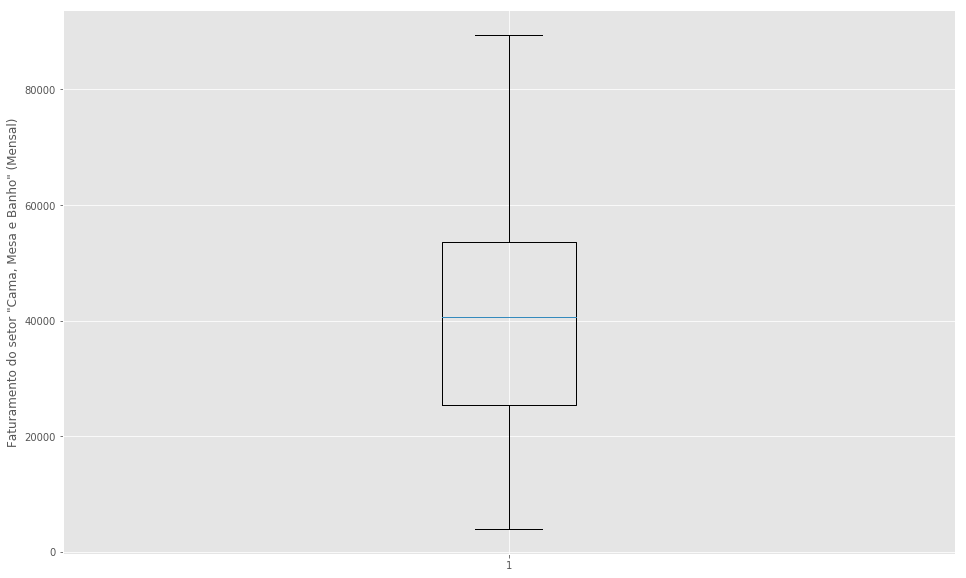

In [75]:
fig2, ax2 = plt.subplots()
ax2.boxplot(produtos_orderItens2['price'])
ax2.set_ylabel('Faturamento do setor "Cama, Mesa e Banho" (Mensal)')
plt.show()

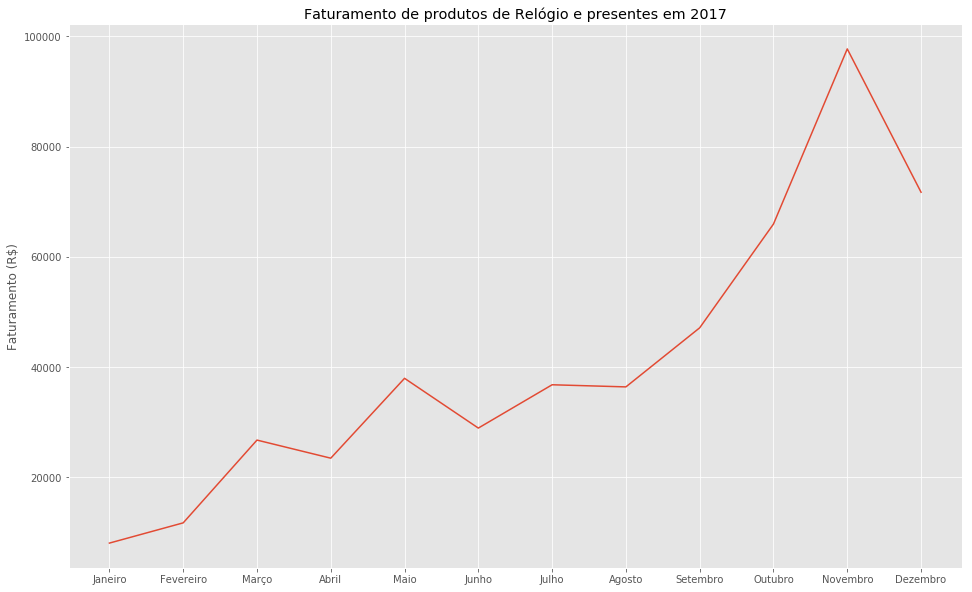

In [76]:
fig, ax = plt.subplots()
ax.set_title('Faturamento de produtos de Relógio e presentes em ' +str(ano))
ax.set_ylabel('Faturamento (R$)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.plot(produtos_orderItens_relogio.index, produtos_orderItens_relogio['price'])
#ax.scatter(produtos_orderItens2.index, produtos_orderItens2['price'])
plt.show()

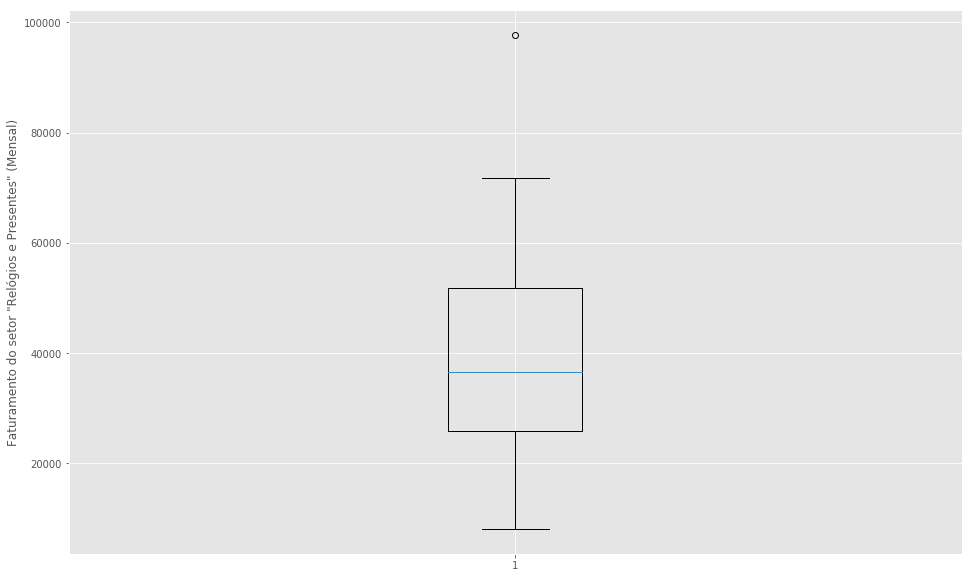

In [77]:
fig2, ax2 = plt.subplots()
ax2.boxplot(produtos_orderItens_relogio['price'])
ax2.set_ylabel('Faturamento do setor "Relógios e Presentes" (Mensal)')
plt.show()

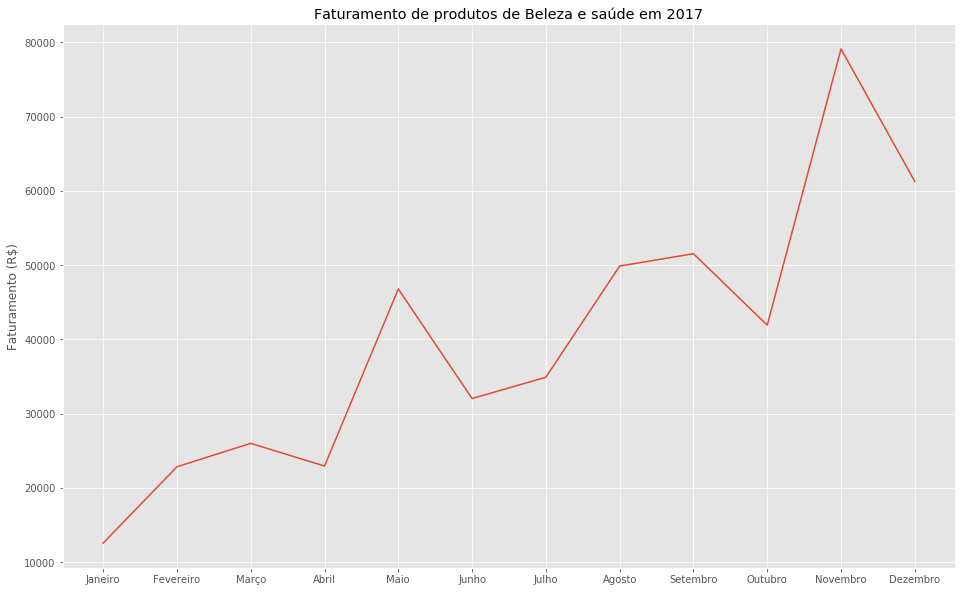

In [78]:
fig, ax = plt.subplots()
ax.set_title('Faturamento de produtos de Beleza e saúde em ' +str(ano))
ax.set_ylabel('Faturamento (R$)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.plot(produtos_orderItens_beleza.index, produtos_orderItens_beleza['price'])
#ax.scatter(produtos_orderItens2.index, produtos_orderItens2['price'])
plt.show()

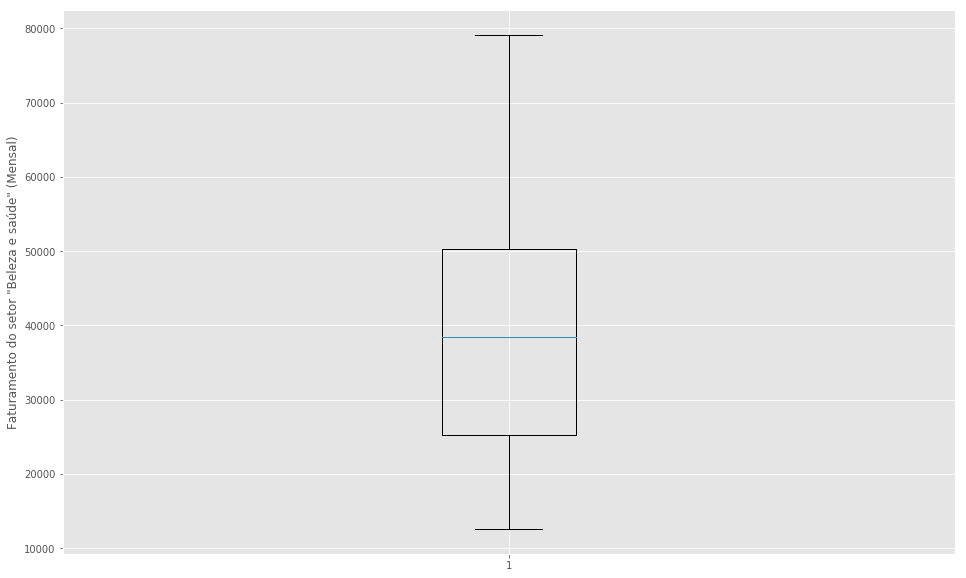

In [79]:
fig2, ax2 = plt.subplots()
ax2.boxplot(produtos_orderItens_beleza['price'])
ax2.set_ylabel('Faturamento do setor "Beleza e saúde" (Mensal)')
plt.show()

# Relação de Status da Compra com Review Score

In [80]:
reviews = raw_orderReviews.copy()
orders = raw_orders.copy()

orders_reviews = orders.merge(reviews)
orders_reviews.groupby(['order_status']).size().reset_index(name='counts')

,order_status,counts
0,approved,2
1,canceled,629
2,created,5
3,delivered,97015
4,invoiced,318
5,processing,302
6,shipped,1118
7,unavailable,611


In [81]:
canceled_score = orders_reviews.groupby(['order_status', 'review_score']).size().reset_index(name='counts')

In [82]:
canceled_score = canceled_score[canceled_score['order_status'] == 'canceled']

canceled_score['percent'] = (canceled_score['counts'] / canceled_score['counts'].sum())*100

[]

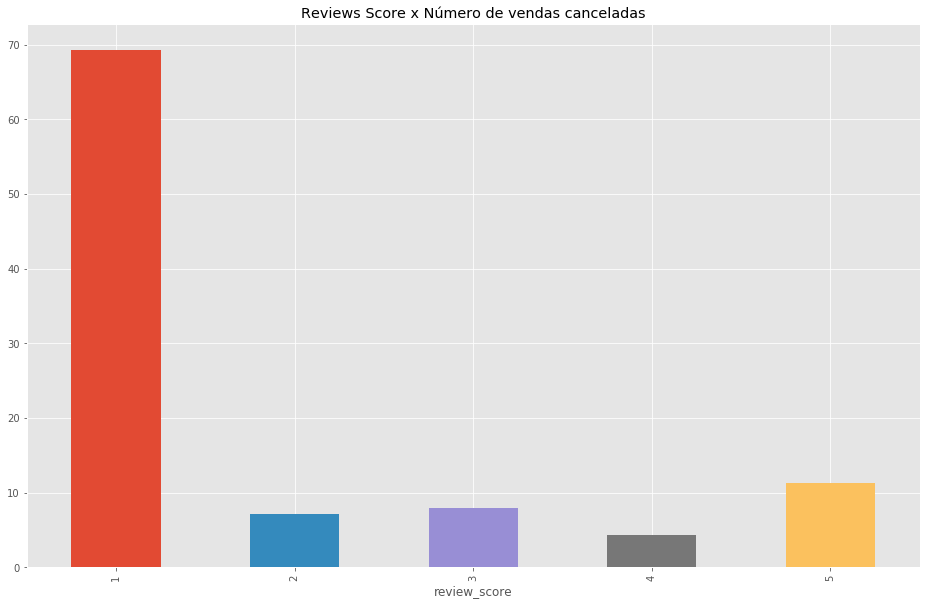

In [83]:
barPlot = canceled_score.plot(kind='bar', x=canceled_score['review_score'].name, y=canceled_score['percent'].name, legend=False)
barPlot.set_title('Reviews Score x Número de vendas canceladas')

barPlot.plot()